In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from cvxopt import matrix, solvers
from numpy import c_

In [2]:
rho = matrix([[4.27,.15,2.85]])

In [3]:
print(rho)

[ 4.27e+00]
[ 1.50e-01]
[ 2.85e+00]



In [4]:
cov_mat = matrix([[0.99,0.18,0.11],[0.18,1.09,0.26], [0.11,0.26,1.99]])

In [5]:
print(cov_mat)

[ 9.90e-01  1.80e-01  1.10e-01]
[ 1.80e-01  1.09e+00  2.60e-01]
[ 1.10e-01  2.60e-01  1.99e+00]



In [6]:
n=len(rho)
print(n)

3


In [7]:
A = matrix(np.c_[np.ones(n), rho]).T
print(A)

[ 1.00e+00  1.00e+00  1.00e+00]
[ 4.27e+00  1.50e-01  2.85e+00]



In [8]:
b = matrix(np.c_[np.ones(1),rho[0]]).T
print(b)

[ 1.00e+00]
[ 4.27e+00]



In [9]:
q = matrix(np.zeros((n, 1)))
sol = solvers.qp(cov_mat,q, A=A, b=b)

In [10]:
print(sol['x'])

[ 8.29e-01]
[-8.99e-02]
[ 2.61e-01]



In [11]:
exp_rets = (np.matmul(sol['x'].T,rho))
print(exp_rets)

[[4.27]]


In [12]:
risk = np.sqrt((np.matmul(np.matmul(sol['x'].T,cov_mat),sol['x'])))
print(risk)
print(cov_mat[0,0], risk*risk)

[[0.91281036]]
0.99 [[0.83322274]]


In [13]:
risk = np.sqrt((sol['x'].T)*cov_mat*sol['x'])
print(risk)

[[0.91281036]]


In [14]:
eff_front_rets = np.linspace(1,8,200)
eff_front_risk = np.linspace(0,0,200)
for i in range(0,200):
    target_l = eff_front_rets[i]
    b = matrix(np.c_[np.ones(1),target_l]).T
    sol1 = solvers.qp(cov_mat,q, A=A, b=b) 
    eff_front_risk[i] = np.sqrt((sol1['x'].T)*cov_mat*sol1['x'])

/tmp/ipykernel_478336/590447816.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  eff_front_risk[i] = np.sqrt((sol1['x'].T)*cov_mat*sol1['x'])


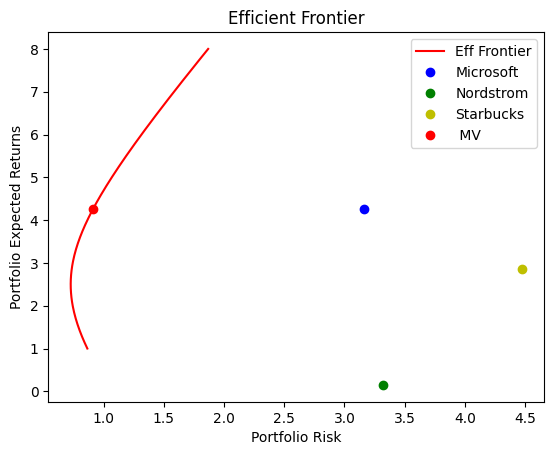

In [23]:
#plotting the efficent frontier along with the 3 individual stocks
plt.xlabel("Portfolio Risk")
plt.ylabel("Portfolio Expected Returns")
plt.title("Efficient Frontier")
plt.plot(eff_front_risk,eff_front_rets, color='red',label="Eff Frontier") 
plt.plot([np.sqrt(10)], rho[0], 'bo', label='Microsoft') 
plt.plot([np.sqrt(11)], rho[1], 'go', label='Nordstrom') 
plt.plot([np.sqrt(20)], rho[2], 'yo',  label='Starbucks')
plt.plot(risk, rho[0], 'ro', label=' MV')
plt.legend()
plt.show()